In [ ]:
# install dependencies
!pip install pycaret

# for Google Colab
!pip install Plotly --upgrade
!pip install pyyaml==5.4.1

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
data = pd.read_csv("/content/nyc_taxi.csv", parse_dates=['timestamp'])
data.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


# Data Wrangling

In [ ]:
# show df properties
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  10320 non-null  datetime64[ns]
 1   value      10320 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 161.4 KB


In [ ]:
# descriptive statistics of the dataset
data.describe()

,value
count,10320.000000
mean,15137.569380
std,6939.495808
min,8.000000
25%,10262.000000
50%,16778.000000
75%,19838.750000
max,39197.000000


In [ ]:
# check null values
data.isnull().sum()

timestamp    0
value        0
dtype: int64

There is no null values in the dataset.

In [ ]:
# number of duplicate in dataset
data.duplicated().sum()

0

There is no duplicated values in the dataset.

#Exploratory Data Analysis

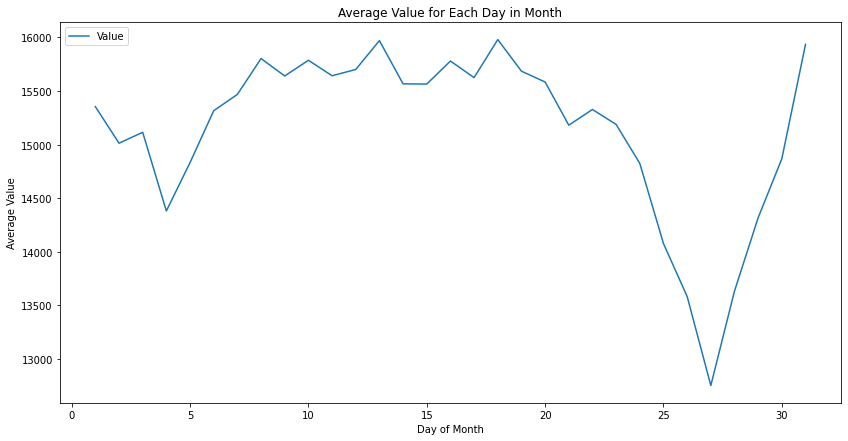

In [ ]:
# group the data by each day in month and find the mean value
day_avg = data.groupby(data.timestamp.dt.day).agg(['mean'])
# plot the groupd data
plt.figure(figsize=(14, 7))
plt.plot(day_avg)
plt.xlabel("Day of Month")
plt.ylabel("Average Value")
plt.title("Average Value for Each Day in Month")
plt.legend(["Value"])

Days between 25 and 30 have a low mean value. Middle of the month have the peak value.

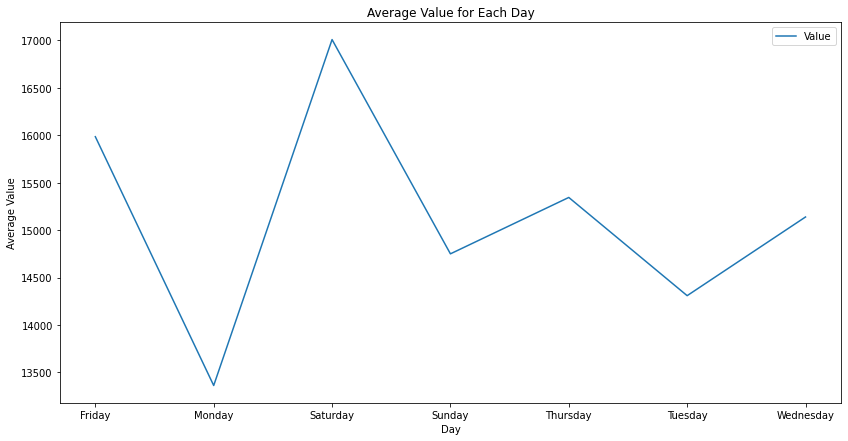

In [ ]:
# group the data by day name in the week and find the mean value
day_name = data.groupby(data.timestamp.dt.day_name()).agg(['mean'])
# Plot the groupd data
plt.figure(figsize=(14, 7))
plt.plot(day_name)
plt.xlabel("Day")
plt.ylabel("Average Value")
plt.title("Average Value for Each Day")
plt.legend(["Value"])

Monday has the lowest average value. Sunday has the largest average value.

In [ ]:
# set timestamp as index
data.set_index('timestamp', inplace=True)
data.head()

,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 00:30:00,8127
2014-07-01 01:00:00,6210
2014-07-01 01:30:00,4656
2014-07-01 02:00:00,3820


In [ ]:
# plot box plot for the data
fig = px.box(data, title='NYC Taxi Trips', template = 'plotly_dark')
fig.show()

The min taxi trips value is 8 and the maximum value near 40000. 

In [ ]:
data[data['value'] > 30373]

,value
timestamp,
2014-11-02 01:00:00,39197
2014-11-02 01:30:00,35212


There are two values larger than upper fence. There are in the same day.

In [ ]:
# plot the data
fig = px.line(data, title='NYC Taxi Trips', template = 'plotly_dark')
fig.show()

Nov 2014 have an increase number of taxi trips. It has the max value in the dataset.

In [ ]:
# create moving averages
data['MA_day'] = data['value'].rolling(48).mean()
data['MA_week'] = data['value'].rolling(48*7).mean()
data.tail()

,value,MA_day,MA_week
timestamp,,,
2015-01-31 21:30:00,24670,18715.645833,12860.928571
2015-01-31 22:00:00,25721,18694.437500,12864.988095
2015-01-31 22:30:00,27309,18703.500000,12871.833333
2015-01-31 23:00:00,26591,18696.479167,12874.660714
2015-01-31 23:30:00,26288,18702.479167,12875.732143


In [ ]:
# plot the data and MA
fig = px.line(data, title='NYC Taxi Trips and MA', template = 'plotly_dark')
fig.show()

#Preprocessing

In [ ]:
# drop MA columns
data.drop(columns=['MA_day', 'MA_week'], inplace=True)
data.head()

,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 00:30:00,8127
2014-07-01 01:00:00,6210
2014-07-01 01:30:00,4656
2014-07-01 02:00:00,3820


In [ ]:
# create features from date
data['year'] = [i.year for i in data.index]
data['month'] = [i.month for i in data.index]
data['week_of_year'] = [i.weekofyear for i in data.index]
data['day'] = [i.day for i in data.index]
data['day_name'] = [i.day_name() for i in data.index]
data['day_of_year'] = [i.dayofyear for i in data.index]
data['hour'] = [i.hour for i in data.index]
data.head()

,value,year,month,week_of_year,day,day_name,day_of_year,hour
timestamp,,,,,,,,
2014-07-01 00:00:00,10844,2014,7,27,1,Tuesday,182,0
2014-07-01 00:30:00,8127,2014,7,27,1,Tuesday,182,0
2014-07-01 01:00:00,6210,2014,7,27,1,Tuesday,182,1
2014-07-01 01:30:00,4656,2014,7,27,1,Tuesday,182,1
2014-07-01 02:00:00,3820,2014,7,27,1,Tuesday,182,2


,value,year,month,week_of_year,day,day_of_year,hour
value,1.000000,-0.043641,4.556711e-02,4.970901e-02,-4.513629e-02,4.157879e-02,6.586407e-01
year,-0.043641,1.000000,-8.831676e-01,-8.371567e-01,6.458861e-03,-8.782390e-01,0.000000e+00
month,0.045567,-0.883168,1.000000e+00,9.196810e-01,-8.058220e-03,9.962822e-01,-7.065276e-19
week_of_year,0.049709,-0.837157,9.196810e-01,1.000000e+00,-1.071532e-03,9.167701e-01,-1.588602e-18
day,-0.045136,0.006459,-8.058220e-03,-1.071532e-03,1.000000e+00,7.800041e-02,1.884420e-18
day_of_year,0.041579,-0.878239,9.962822e-01,9.167701e-01,7.800041e-02,1.000000e+00,1.483346e-18
hour,0.658641,0.000000,-7.065276e-19,-1.588602e-18,1.884420e-18,1.483346e-18,1.000000e+00


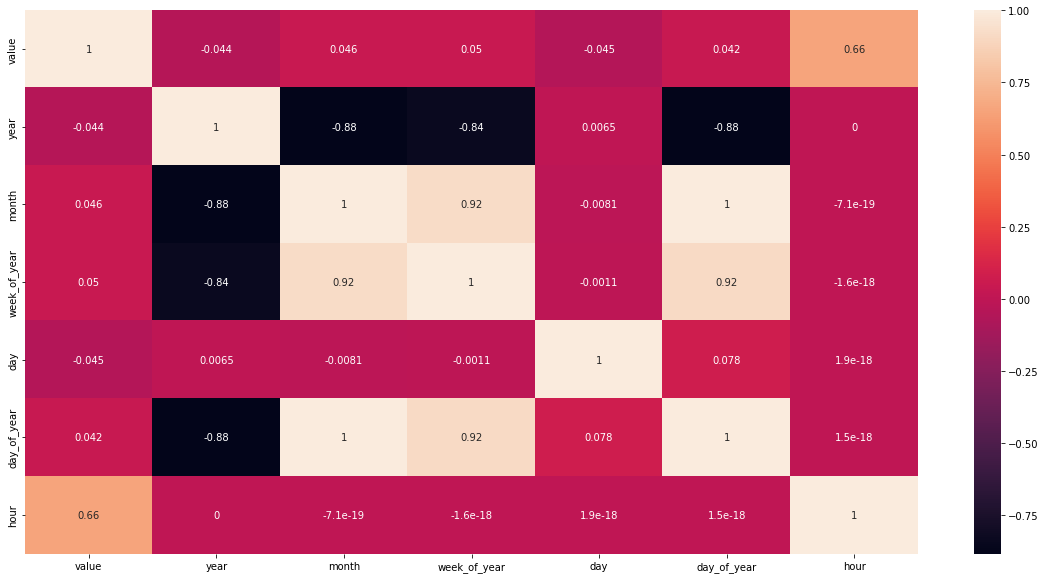

In [ ]:
# finding correlation between variables with heatmap
plt.figure(figsize=(20,10))
c= data.corr()
sns.heatmap(c,annot=True)
c

There are a high correlation between day of year and week of year. Also between month and week of year. will drop week of year and month columns.

In [ ]:
# drop week of year and month columns.
data.drop(columns=['month', 'week_of_year'], inplace=True)
data.head()

,value,year,day,day_name,day_of_year,hour
timestamp,,,,,,
2014-07-01 00:00:00,10844,2014,1,Tuesday,182,0
2014-07-01 00:30:00,8127,2014,1,Tuesday,182,0
2014-07-01 01:00:00,6210,2014,1,Tuesday,182,1
2014-07-01 01:30:00,4656,2014,1,Tuesday,182,1
2014-07-01 02:00:00,3820,2014,1,Tuesday,182,2


# Machine Learning Regression Model

In [ ]:
# import the regression module
from pycaret.regression import *

# initialize setup
s = setup(data = data, target = 'value', fold_strategy = 'timeseries',
          ordinal_features = {'day_name' : ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday','Sunday','Saturday',]}, numeric_features=['year'], session_id = 123, normalize = True)

,Description,Value
0,session_id,123
1,Target,value
2,Original Data,"(10320, 6)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,1
6,Ordinal Features,True
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7223, 5)"


In [ ]:
# train and evaluate all models
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1224.3384,3.003377e+06,1709.6590,0.9365,0.2605,0.2826,0.109
rf,Random Forest Regressor,1291.8640,3.604989e+06,1877.7043,0.9237,0.2528,0.2793,0.860
et,Extra Trees Regressor,1415.6663,4.192643e+06,2031.0325,0.9111,0.2491,0.2700,0.690
dt,Decision Tree Regressor,1595.9790,5.983232e+06,2411.3333,0.8734,0.2854,0.2700,0.023
gbr,Gradient Boosting Regressor,1831.1104,5.826558e+06,2408.3340,0.8769,0.3178,0.4205,0.188
knn,K Neighbors Regressor,2270.2961,9.718003e+06,3067.2272,0.7948,0.3573,0.3434,0.065
ada,AdaBoost Regressor,3452.0953,1.730128e+07,4155.9260,0.6343,0.5281,0.9791,0.174
par,Passive Aggressive Regressor,4036.7264,2.740451e+07,5232.5039,0.4199,0.5953,1.2117,0.021
huber,Huber Regressor,4062.3063,2.699275e+07,5192.7301,0.4287,0.5858,1.1467,0.028
lar,Least Angle Regression,4121.9824,2.631448e+07,5127.1887,0.4432,0.5924,1.2029,0.014


The best algorithm  is Light Gradient Boosting Machine with MAE of 1224.3 and R2 0.9365. We will choose this algorithm .


In [ ]:
# the score on the test set
prediction_holdout = predict_model(best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1072.4814,2.228243e+06,1492.7301,0.9551,0.2014,0.1422


The MAE score for running the Light Gradient Boosting Machine model in the test set is 12% lower than the cross-validated MAE, which indicates a good result.

In [ ]:
# generate predictions on the original dataset
predictions = predict_model(best, data=data)
predictions

,value,year,day,day_name,day_of_year,hour,Label
timestamp,,,,,,,
2014-07-01 00:00:00,10844,2014,1,Tuesday,182,0,9647.422239
2014-07-01 00:30:00,8127,2014,1,Tuesday,182,0,9647.422239
2014-07-01 01:00:00,6210,2014,1,Tuesday,182,1,7043.513823
2014-07-01 01:30:00,4656,2014,1,Tuesday,182,1,7043.513823
2014-07-01 02:00:00,3820,2014,1,Tuesday,182,2,5143.582452
...,...,...,...,...,...,...,...
2015-01-31 21:30:00,24670,2015,31,Saturday,31,21,25068.055540
2015-01-31 22:00:00,25721,2015,31,Saturday,31,22,26146.857802
2015-01-31 22:30:00,27309,2015,31,Saturday,31,22,26146.857802


In [ ]:
# plot the actual and predicted lines to visualize the fit
fig = px.line(predictions, x=predictions.index, y=["value", "Label"], title = 'Actual and Predicted Lines', template = 'plotly_dark')
fig.show()

In [ ]:
# finalize the model; train the best model on the entire dataset
final_best = finalize_model(best)

In [ ]:
# create future scoring dataset
future_dates = pd.date_range(start = '2015-02-01', end = '2015-02-28', freq = 'H')
future_df = pd.DataFrame()

In [ ]:
# create features from date
future_df['year'] = [i.year for i in future_dates]
future_df['day'] = [i.day for i in future_dates]
future_df['day_name'] = [i.day_name() for i in future_dates]
future_df['day_of_year'] = [i.dayofyear for i in future_dates]
future_df['hour'] = [i.hour for i in future_dates]
future_df.set_axis(future_dates, inplace=True)
future_df.head()

,year,day,day_name,day_of_year,hour
2015-02-01 00:00:00,2015,1,Sunday,32,0
2015-02-01 01:00:00,2015,1,Sunday,32,1
2015-02-01 02:00:00,2015,1,Sunday,32,2
2015-02-01 03:00:00,2015,1,Sunday,32,3
2015-02-01 04:00:00,2015,1,Sunday,32,4


In [ ]:
# use the future dataframe to score and generate predictions
predictions_future = predict_model(final_best, data=future_df)
predictions_future.head()

,year,day,day_name,day_of_year,hour,Label
2015-02-01 00:00:00,2015,1,Sunday,32,0,21299.000572
2015-02-01 01:00:00,2015,1,Sunday,32,1,19244.078869
2015-02-01 02:00:00,2015,1,Sunday,32,2,16282.944171
2015-02-01 03:00:00,2015,1,Sunday,32,3,12658.778339
2015-02-01 04:00:00,2015,1,Sunday,32,4,6596.626670


In [ ]:
# concat the original dataset with future predictions
concat_df = pd.concat([data,predictions_future], axis=0)
concat_df

,value,year,day,day_name,day_of_year,hour,Label
2014-07-01 00:00:00,10844.0,2014,1,Tuesday,182,0,NaN
2014-07-01 00:30:00,8127.0,2014,1,Tuesday,182,0,NaN
2014-07-01 01:00:00,6210.0,2014,1,Tuesday,182,1,NaN
2014-07-01 01:30:00,4656.0,2014,1,Tuesday,182,1,NaN
2014-07-01 02:00:00,3820.0,2014,1,Tuesday,182,2,NaN
...,...,...,...,...,...,...,...
2015-02-27 20:00:00,NaN,2015,27,Friday,58,20,23226.967272
2015-02-27 21:00:00,NaN,2015,27,Friday,58,21,23344.832285
2015-02-27 22:00:00,NaN,2015,27,Friday,58,22,24232.828321
2015-02-27 23:00:00,NaN,2015,27,Friday,58,23,24242.978307


In [ ]:
# plot the original dataset with future predictions
fig = px.line(concat_df, x=concat_df.index, y=["value", "Label"], title="The Original Dataset with Future Predictions", template = 'plotly_dark')
fig.show()

#Anomaly Detection

In [ ]:
# import the anomaly module
from pycaret.anomaly import *

# initialize setup
s = setup(predictions_future, session_id = 42,
          ordinal_features = {'day_name' : ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday','Sunday','Saturday',]},
          numeric_features=['year'], normalize=True)

,Description,Value
0,session_id,42
1,Original Data,"(649, 6)"
2,Missing Values,False
3,Numeric Features,5
4,Categorical Features,1
5,Ordinal Features,True
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(649, 6)"
9,CPU Jobs,-1


In [ ]:
# check list of available models
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


After experimenting with all those models, we choose One-class SVM detector model.

In [ ]:
# train the svm model
svm = create_model('svm')
svm_results = assign_model(svm)
svm_results.head()

,year,day,day_name,day_of_year,hour,Label,Anomaly,Anomaly_Score
2015-02-01 00:00:00,2015,1,Sunday,32,0,21299.000572,1,20.977970
2015-02-01 01:00:00,2015,1,Sunday,32,1,19244.078869,1,16.439475
2015-02-01 02:00:00,2015,1,Sunday,32,2,16282.944171,0,11.647960
2015-02-01 03:00:00,2015,1,Sunday,32,3,12658.778339,0,8.528735
2015-02-01 04:00:00,2015,1,Sunday,32,4,6596.626670,0,10.996192


In [ ]:
# check anomalies
svm_results[svm_results['Anomaly'] == 1].head()

,year,day,day_name,day_of_year,hour,Label,Anomaly,Anomaly_Score
2015-02-01 00:00:00,2015,1,Sunday,32,0,21299.000572,1,20.977970
2015-02-01 01:00:00,2015,1,Sunday,32,1,19244.078869,1,16.439475
2015-02-01 05:00:00,2015,1,Sunday,32,5,3623.910492,1,14.649370
2015-02-01 06:00:00,2015,1,Sunday,32,6,3535.737241,1,14.396469
2015-02-01 22:00:00,2015,1,Sunday,32,22,13939.189919,1,13.245427


In [ ]:
import plotly.graph_objects as go

# plot value on y axis and date on x axis
fig = px.line(svm_results, x=svm_results.index, y="Label", title='NYC Taxi Trips Anomaly Detection', template = 'plotly_dark')
# create list of outlier_dates
outlier_dates = svm_results[svm_results['Anomaly'] == 1].index
# get y value of anomalies to plot
y_values = [svm_results.loc[i]['Label'] for i in outlier_dates]
fig.add_trace(go.Scatter(x=outlier_dates, y=y_values, mode = 'markers', 
                name = 'Anomaly', 
                marker=dict(color='red',size=10)))
        
fig.show()